In [ ]:
%%shell
pip install mpu
git clone https://gitlab.com/sergedurand/slt_with_pose/

Cloning into 'slt_with_pose'...
remote: Enumerating objects: 218, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (161/161), done.
remote: Total 218 (delta 64), reused 159 (delta 47), pack-reused 0
Receiving objects: 100% (218/218), 3.53 MiB | 14.69 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
import mpu
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [ ]:
def print_summary(df):
    mean = df.mean()
    std = df.std()
    best_wer = df["wer"].min()
    best_wer_seed = df["wer"].idxmin()
    best_bleu = df["bleu"].max()
    best_bleu_seed = df["bleu"].idxmax()
    print("Mean wer = {:.4f}, mean bleu = {:.4f}".format(mean["wer"],mean["bleu"]))
    print("Std wer = {:.4f}, std bleu = {:.4f}".format(std["wer"],std["bleu"]))
    print("Best WER = {:.4f} for seed {}".format(best_wer,best_wer_seed))
    if best_bleu_seed != best_wer_seed:
        print("Corresponding BLEU = {:.4f}".format(df.loc[best_wer_seed]["bleu"]))
    print("Best BLEU = {:.4f} for seed {}".format(best_bleu,best_bleu_seed))
    if best_bleu_seed != best_wer_seed:
        print("Corresponding WER = {:.4f}".format(df.loc[best_bleu_seed]["wer"]))
def print_stat(data):
    if "DEV" in data.keys():
        df = pd.DataFrame.from_dict(data["DEV"],"index")
        print(60 * "=")
        print("Stat on DEV set")
        print(df.describe())
        print(60 * "=")
        print("WER results")
        print(df["wer"])
        print(60 * "=")
        print("BLEU results")
        print(df["bleu"])
        print(60 * "=")
        print("Stat on TEST set")
        df = pd.DataFrame.from_dict(data["TEST"],"index")
        print(df.describe())
        print(60 * "=")
        print("WER results")    
        print(df["wer"])
        print(60 * "=")
        print("BLEU results")
        print(df["bleu"])
    else: # in this case I forgot to add dev res so everything is results on test
        df = pd.DataFrame.from_dict(data,"index")
        print(60 * "=")
        print("Stat on TEST set")
        print(df.describe())
        print(60 * "=")
        print("WER results")    
        print(df["wer"])
        print(60 * "=")
        print("BLEU results")
        print(df["bleu"])

In [ ]:
results = Path("/content/slt_with_pose/results/256/").glob("*.pickle")
for res in results:
    data = mpu.io.read(str(res))
    print("*" * 60)
    print(res.stem)
    print("*" * 60)
    if "DEV" in data.keys():
        df = pd.DataFrame.from_dict(data["DEV"],"index")
        print("=" * 60)
        print("DEV")
        print_summary(df)
        df = pd.DataFrame.from_dict(data["TEST"],"index")
        print("=" * 60)
        print("TEST")
        print_summary(df)
    else:
        df = pd.DataFrame.from_dict(data,"index")
        print("=" *60)
        print("TEST")
        print_summary(df)
        print(df["wer"])
        print(df["bleu"])

************************************************************
SLT_orig_256
************************************************************
DEV
Mean wer = 31.8762, mean bleu = 21.4384
Std wer = 1.7482, std bleu = 0.2987
Best WER = 29.9440 for seed 1
Corresponding BLEU = 21.7478
Best BLEU = 21.7711 for seed 7
Corresponding WER = 31.0915
TEST
Mean wer = 30.4461, mean bleu = 21.5018
Std wer = 1.2873, std bleu = 0.5102
Best WER = 28.7861 for seed 1
Corresponding BLEU = 21.1445
Best BLEU = 22.4125 for seed 100
Corresponding WER = 31.2515
************************************************************
DOPE_FBH_all_256
************************************************************
DEV
Mean wer = 31.6386, mean bleu = 21.2277
Std wer = 2.1784, std bleu = 0.6224
Best WER = 28.9565 for seed 33
Best BLEU = 21.8982 for seed 33
TEST
Mean wer = 30.5236, mean bleu = 20.9907
Std wer = 1.6001, std bleu = 0.7004
Best WER = 28.2461 for seed 33
Best BLEU = 22.1907 for seed 33
****************************************

In [ ]:
from pathlib import Path
results = Path("/content/slt_with_pose/results/256/").glob("*.pickle")
merged_test_wer = pd.DataFrame()
merged_test_bleu = pd.DataFrame()
merged_dev_wer = pd.DataFrame()
merged_dev_bleu = pd.DataFrame()
diff_wer = pd.DataFrame()
diff_bleu = pd.DataFrame()
for res in results:
    name = str(res.stem)
    data = mpu.io.read(str(res))
    df_test = pd.DataFrame.from_dict(data["TEST"],"index")
    df_dev = pd.DataFrame.from_dict(data["DEV"],"index")
    df_test.index = list(range(10))
    df_dev.index = list(range(10))
    diff_wer[name] = df_test["wer"] - df_dev["wer"]
    diff_bleu[name] = df_test["bleu"] - df_dev["bleu"]
    merged_test_wer[name] = df_test["wer"]
    merged_test_bleu[name] = df_test["bleu"]
    merged_dev_wer[name] = df_dev["wer"]
    merged_dev_bleu[name] = df_dev["bleu"]

### Box plot for the WER scores on DEV set with HSxFF = 256x1024

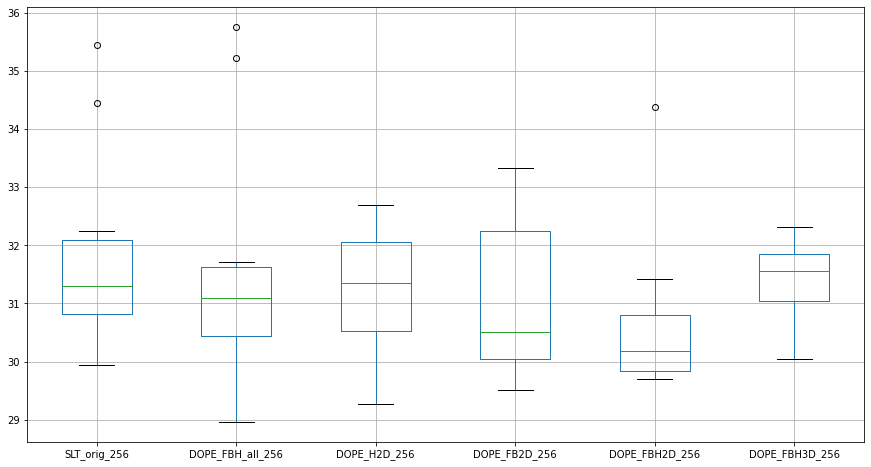

In [ ]:
fig = plt.figure(figsize=(15,8))
merged_dev_wer.boxplot()

### Box plot for the WER scores on TEST set with HSxFF = 256x1024


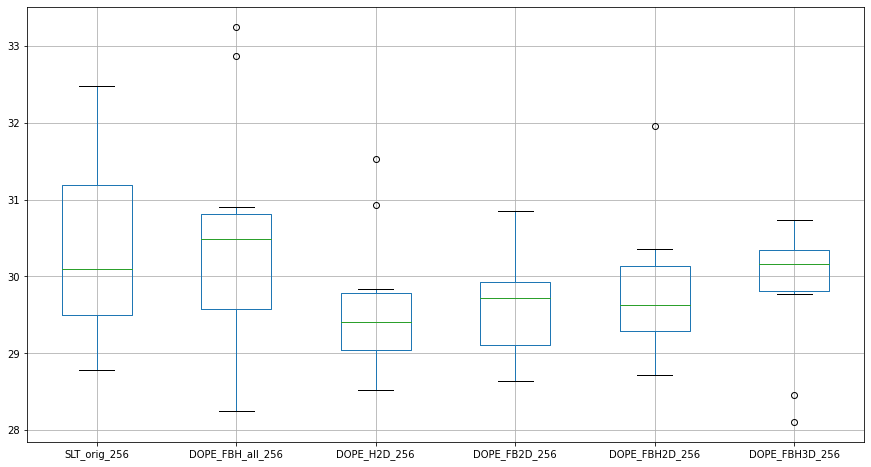

In [ ]:
fig = plt.figure(figsize=(15,8))
merged_test_wer.boxplot()

### Box plot for the BLEU scores on DEV set with HSxFF = 256x1024


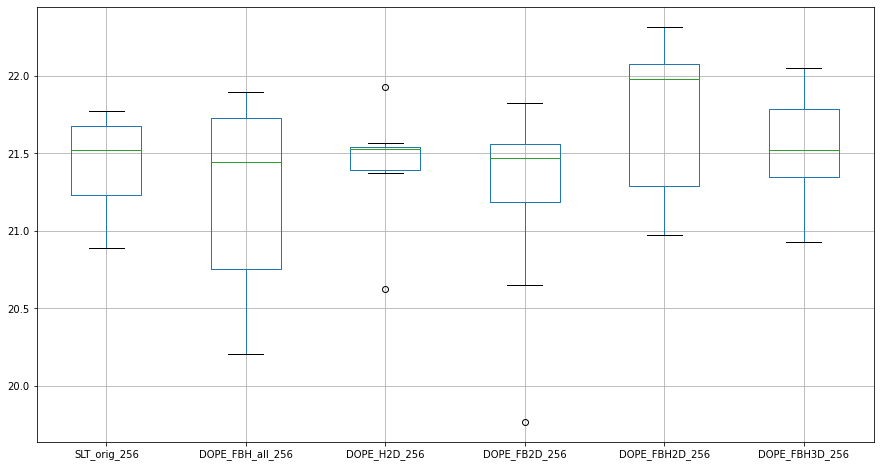

In [ ]:
fig = plt.figure(figsize=(15,8))
merged_dev_bleu.boxplot()

### Box plot for the BLEU scores on TEST set with HSxFF = 256x1024


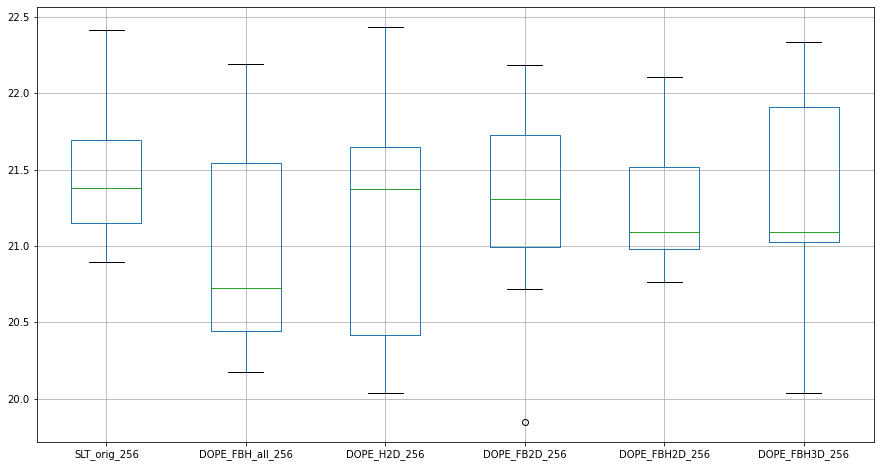

In [ ]:
fig = plt.figure(figsize=(15,8))
merged_test_bleu.boxplot()

In [ ]:
data = mpu.io.read("slt_H_trainstat.pickle")
df = pd.DataFrame.from_dict(data,"index")
df

wer_base  bleu_base  epoch  step  CTC_bream  trans_beam  alpha
2       29.68      20.43     21  4550         10           9      3
1       30.05      20.39     19  4150          9           5     -1
50      31.20      20.81     17  3700          9          10      2
3       29.60      20.16     21  4550          8           6      4
9       29.81      19.67     16  3550          7           2      3
7       31.71      20.45     16  3500          4           2      2
111     32.19      20.02     15  3250         10           2      2
10      30.64      20.47     21  4500          7           3      2
100     31.81      20.83     19  4050         10           5      1
200     29.81      20.59     25  5400          5           5      1